**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [3]:
# Import the data set
df=pd.read_csv('cleaned_data.csv')

In [4]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [5]:
import matplotlib.pyplot as plt 
import math 

In [6]:
# Define the sigmoid function
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

In [7]:
from sklearn.model_selection import train_test_split

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [14]:
# Create a train/test split
X, y = np.arange(10).reshape((5, 2)), range(5)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [16]:
X_train
y_train
X_test
y_test

[4]

______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [18]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'liblinear')

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [22]:
# Fit the logistic regression model on training data
logisticRegr.fit(X, y)

LogisticRegression(solver='liblinear')

In [25]:
# Make predictions using `.predict()`
logisticRegr.predict(X)

array([0, 3, 4, 4, 4])

In [48]:
# Find class probabilities using `.predict_proba()`
logisticRegr.predict_proba(X)

array([[0.26339563, 0.2321286 , 0.19836432, 0.16723082, 0.13888063],
       [0.12190556, 0.20796559, 0.22513705, 0.22542021, 0.21957158],
       [0.03506551, 0.1527284 , 0.22608698, 0.27442818, 0.31169093],
       [0.00811481, 0.09446119, 0.20079736, 0.30078008, 0.39584656],
       [0.00172461, 0.05282028, 0.16533442, 0.31020254, 0.46991815]])

In [28]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=24, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', random_state=24, solver='liblinear')

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [31]:
logisticRegr.classes_


array([[-0.54606213, -0.26484728],
       [-0.156872  , -0.19039682],
       [ 0.0588654 , -0.21611918],
       [ 0.23443162, -0.25955597],
       [ 0.39684136, -0.30961716]])

In [34]:
# Add column of 1s to features
#X= x.to_frame().assign(col1=1)

In [35]:
# Get coefficients and intercepts from trained model
logisticRegr.intercept_
logisticRegr.coef_

array([[-0.54606213, -0.26484728],
       [-0.156872  , -0.19039682],
       [ 0.0588654 , -0.21611918],
       [ 0.23443162, -0.25955597],
       [ 0.39684136, -0.30961716]])

In [36]:
# Manually calculate predicted probabilities
logisticRegr.score(X, y)

0.4

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [39]:
# Manually calculate predicted classes
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y, logisticRegr.predict(X))

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=int64)

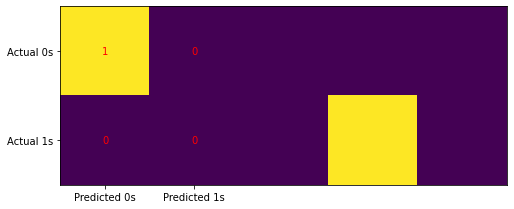

In [44]:
# Compare to scikit-learn's predicted classes
cm = confusion_matrix(y, logisticRegr.predict(X))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [62]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn import metrics
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr
tpr
thresholds

array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])

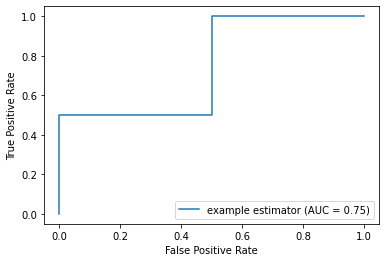

In [65]:
# Use manually calculated predicted probabilities to calculate ROC AUC
y = np.array([0, 0, 1, 1])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()  
plt.show()      